In [1]:
import classes.QSys as qsys
import classes.QSim as qsim
import QuantumToolbox as qtbox
import QuantumToolbox.operators as oper
import QuantumToolbox.functions as qFncs
import QuantumToolbox.operators as qOps
import QuantumToolbox.liouvillian as lio
import QuantumToolbox.states as states
import Plotting.SimplePlots as sPlt

import scipy.sparse as sp
import numpy as np

from functools import partial
from multiprocessing import Pool, cpu_count

In [2]:
resonatorDimension = 200
g = 1.79
qfreq = 0
resFreq = 2
irreg = False

In [3]:
def digitalRabi(obj, stepSize):
    sigmaX = obj.sigmaX(obj.subSystems[0].dimension)
    HamJC = 2 * np.pi * (((obj.subSystems[0].frequency/2)*obj.subSystems[0].freeMat) + obj.couplingHam)
    UnitaryJC = lio.Liouvillian(HamJC, timeStep=(stepSize / 2))
    UnitaryAJC = (UnitaryJC @ UnitaryJC)
    print(sigmaX.A.shape, UnitaryJC.A.shape)
    Unitary = UnitaryJC @ sigmaX @ UnitaryAJC @ sigmaX @ UnitaryJC
    return Unitary

In [4]:
JCSys = qsys.QuantumSystem()
cav = qsys.Cavity(dimension=resonatorDimension, frequency=resFreq)
JCSys.addSubSys(cav)

qub = JCSys.createSubSys(subClass=qsys.Qubit)
qub.frequency = qfreq
#qub.freeMat = None

In [5]:
JCcoupling = JCSys.coupleBy(cav, qub,'JC', g)
"""JCcoupling = qsys.qCoupling()
JCSys.addSysCoupling(JCcoupling)"""

JCSys.initialState = sp.kron(states.basis(cav.dimension, 0), states.basis(2, 0), format='csc')

sigmaz


simulating
{}


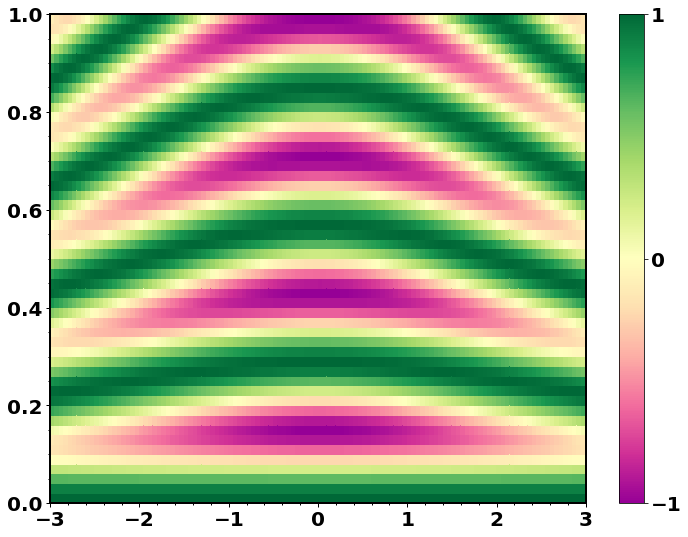

In [6]:
qSim = qsim.Simulation(JCSys)
qSim.sweepKey = 'frequency'

cavParity = qOps.number
p = Pool(processes=cpu_count())
print('simulating')
statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)

sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit, irregular=irreg)
print(JCSys._QuantumSystem__kept)

In [7]:
print(cav.dimension)

200


In [8]:
JCSys.reset()
JCSys.createSysCoupling([qub,cav],[qtbox.operators.sigmax, qtbox.operators.create], g)
JCSys.createSysCoupling([cav, qub],[qtbox.operators.destroy, qtbox.operators.sigmax], g)
JCSys.couplingName = 'Rabi'

print(JCSys.couplingName)

Rabi


simulating
{'JC': [{0: <classes.QSys.sysCoupling object at 0xa1b032590>}, None]}


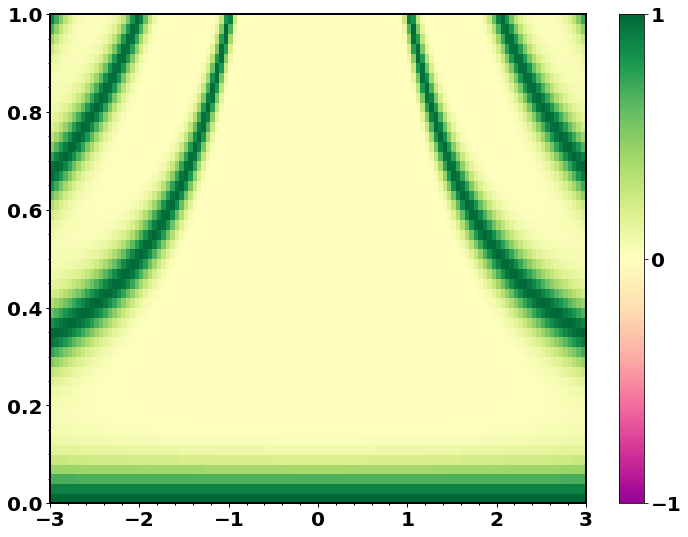

In [9]:
qSim.qSys = JCSys
print('simulating')
statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)
sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit, irregular=irreg)
print(JCSys._QuantumSystem__kept)

In [10]:
print(statesDigit[90][10].A.shape)

(406, 1)


In [11]:
JCSys.reset(to='JC')
#JCSys.addCoupling([qub,cav],[qtbox.operators.destroy, qtbox.operators.create], g)
#JCSys.addCoupling([cav, qub],[qtbox.operators.destroy, qtbox.operators.create], g)
JCSys.sigmaX = oper.sigmax
JCSys.Unitaries = digitalRabi

In [12]:
qSim.qSys = JCSys
print('simulating')
statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
print('calculating')
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)
sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit, irregular=irreg)
print(JCSys._QuantumSystem__kept)

simulating


ValueError: dimension mismatch

{'JC': [{0: <classes.QSys.sysCoupling object at 0xa1b032590>}, None], 'Rabi': [{0: <classes.QSys.sysCoupling object at 0xa1b13b4b0>, 1: <classes.QSys.sysCoupling object at 0xa1b13b8a0>}, None], 2: [{0: <classes.QSys.sysCoupling object at 0xa1b032590>}, <function digitalRabi at 0xa1b02edd0>]}


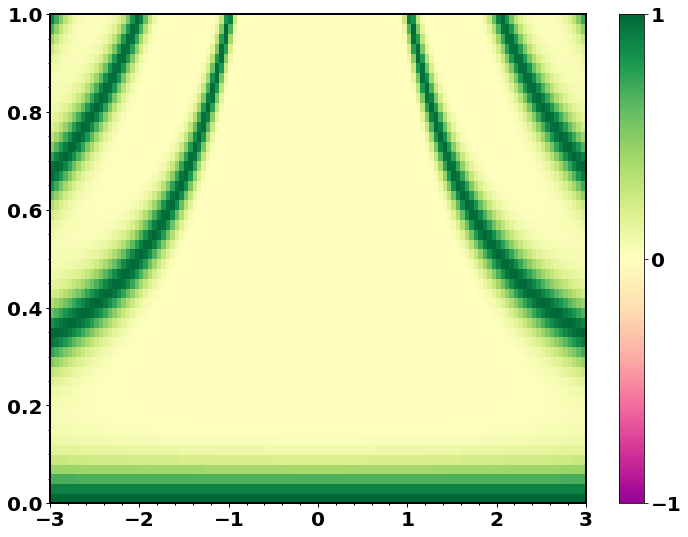

In [13]:
JCSys.reset(to='Rabi')

qSim.qSys = JCSys

statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)
sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit, irregular=irreg)
print(JCSys._QuantumSystem__kept)

{'JC': [{0: <classes.QSys.sysCoupling object at 0xa1b032590>}, None], 'Rabi': [{0: <classes.QSys.sysCoupling object at 0xa1b13b4b0>, 1: <classes.QSys.sysCoupling object at 0xa1b13b8a0>}, None], 2: [{0: <classes.QSys.sysCoupling object at 0xa1b032590>}, <function digitalRabi at 0xa1b02edd0>]}


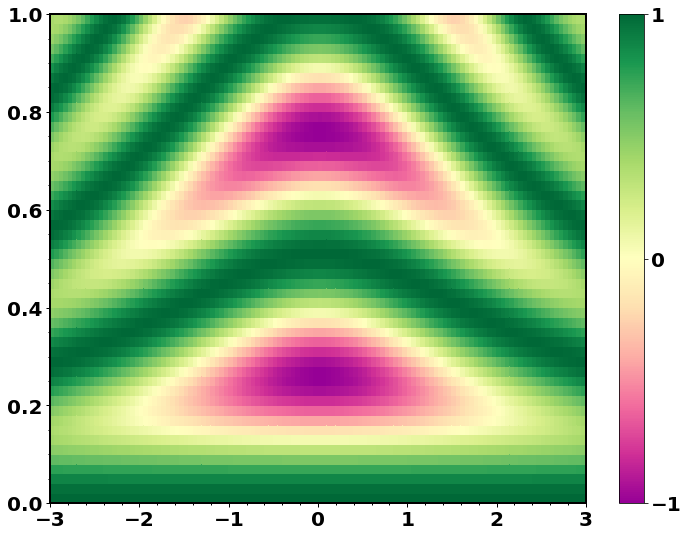

In [14]:
JCSys.reset(to='JC')
JCcoupling.couplingStrength = 1
qSim.qSys = JCSys
statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)
sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit, irregular=irreg)
print(JCSys._QuantumSystem__kept)

In [ ]:
JCSys.reset(to=2)
print(JCSys.couplingName)
JCcoupling.couplingStrength = 1.79
qSim.qSys = JCSys
statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)
sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit, irregular=irreg)
print(JCSys._QuantumSystem__kept)